## Import Libraries

In [128]:
!pip install tensorflow-gpu==2.3.1

In [86]:
import tensorflow as tf
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Tf version

In [87]:
print(tf.__version__)

2.3.1


## Open the text file (data)

In [90]:
f= open('Deathnote-script.txt' , encoding = 'utf-8')
d= " "
x = []
for i in f:
    x.append(i)

xx = d.join(x)
#xx = x.split("\n")

data = xx.split("\n")
#print(yy[:10])

In [91]:
data

' Deathnote Script:\n\n\nWithin the spreading darkness\n\nI pledged a vow to the revolution\n\nI can\'t let anybody interrupt it\n\nI\'m going to change\n\nThe future that\nthe forbidden fruit foretells...\n\nI\'m going to change\n\nThe dream into reality\n\nThe ending\n\nThat everybody wants\n\nWithin the spreading darkness\n\nI pledged our vow to the revolution\n\nI can\'t let anybody interrupt it\n\nSomeday I\'ll show you\n\nA bright and ideal\n\nWorld\n\nSHINIGAMI REALM\n\nWhat?\nTwo death\'s heads again?\n\nHah! I win.\nDon\'t hold it against me.\n\nHey Ryuk... Do you wanna join us?\n\nJoin us, for once.\n\nNo, I\'m okay.\n\nI didn\'t do anything\nbut he still got upset...\n\nReally? And then?\n\nWhat\'s the matter, Yagami?\n\nPlease translate the sentence.\n\nFollow the teachings of God.\n\nThen the blessings of the sea\nwill become bountiful...\n\nAnd there will be no storms.\n\nToday, at approximately 11 a. m. in\nKanagawa Prefecture in Yokohama,\n\nthe body of a man appearing\

In [92]:
#split at new line
data = data.split("\n")

['Deathnote Script:', ' ', ' ', ' Within the spreading darkness', ' ', ' I pledged a vow to the revolution', ' ', " I can't let anybody interrupt it", ' ', " I'm going to change"]


In [93]:
data[0 : 10]

[' Deathnote Script:',
 '',
 '',
 'Within the spreading darkness',
 '',
 'I pledged a vow to the revolution',
 '',
 "I can't let anybody interrupt it",
 '',
 "I'm going to change"]

In [94]:
len(data)

3511

In [95]:
#join data
final_data = " ".join(data)

In [96]:
final_data[:87]


' Deathnote Script:   Within the spreading darkness  I pledged a vow to the revolution  '

## Clean text

In [97]:
def clean_text(doc):
    tokens = doc.split(" ")   #white space sep
    punc = str.maketrans("","",string.punctuation) # all punc
    tokens = [w.translate(punc) for w in tokens]  #remove punc
    tokens = [word for word in tokens if word.isalpha()]  #only alpha
    tokens = [word.lower() for word in tokens]  #lower
    return tokens

In [98]:
tokens = clean_text(final_data)

In [99]:
tokens[:30]

['deathnote',
 'script',
 'within',
 'the',
 'spreading',
 'darkness',
 'i',
 'pledged',
 'a',
 'vow',
 'to',
 'the',
 'revolution',
 'i',
 'cant',
 'let',
 'anybody',
 'interrupt',
 'it',
 'im',
 'going',
 'to',
 'change',
 'the',
 'future',
 'that',
 'the',
 'forbidden',
 'fruit',
 'foretells']

In [100]:
token_length = len(tokens)   #length
token_length

9665

In [101]:
unique_token_len = len(set(tokens))   #length of unique word in tokens(also called voc size)
unique_token_len

1542

## Creata Data Sequence

In [102]:
#50 - ip
#1 - op

input_length = 50+1
lines = []

for i in range(input_length , len(tokens)):
    seq = tokens[i-input_length : i]  #0 to inp length
    line = " ".join(seq)   # join to make inp sequence
    lines.append(line)    # append in list
    
print(len(lines))


9614


## Check 1st input 

In [103]:
lines[0]

'deathnote script within the spreading darkness i pledged a vow to the revolution i cant let anybody interrupt it im going to change the future that the forbidden fruit foretells im going to change the dream into reality the ending that everybody wants within the spreading darkness i pledged our vow'

In [104]:
tokens[50]

'vow'

In [105]:
lines[1]

'script within the spreading darkness i pledged a vow to the revolution i cant let anybody interrupt it im going to change the future that the forbidden fruit foretells im going to change the dream into reality the ending that everybody wants within the spreading darkness i pledged our vow to'

In [106]:
tokens[51]

'to'

## Libs

In [107]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,LSTM ,Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Tokenizing

In [108]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)   #tokens applied on lines
seq = tokenizer.texts_to_sequences(lines)

In [109]:
seq       #list of int values for the words

[[1541,
  1540,
  151,
  1,
  224,
  223,
  3,
  222,
  5,
  221,
  2,
  1,
  220,
  3,
  54,
  153,
  219,
  196,
  8,
  19,
  46,
  2,
  179,
  1,
  436,
  7,
  1,
  435,
  434,
  433,
  19,
  46,
  2,
  179,
  1,
  195,
  152,
  194,
  1,
  428,
  7,
  427,
  353,
  151,
  1,
  224,
  223,
  3,
  222,
  84,
  221],
 [1540,
  151,
  1,
  224,
  223,
  3,
  222,
  5,
  221,
  2,
  1,
  220,
  3,
  54,
  153,
  219,
  196,
  8,
  19,
  46,
  2,
  179,
  1,
  436,
  7,
  1,
  435,
  434,
  433,
  19,
  46,
  2,
  179,
  1,
  195,
  152,
  194,
  1,
  428,
  7,
  427,
  353,
  151,
  1,
  224,
  223,
  3,
  222,
  84,
  221,
  2],
 [151,
  1,
  224,
  223,
  3,
  222,
  5,
  221,
  2,
  1,
  220,
  3,
  54,
  153,
  219,
  196,
  8,
  19,
  46,
  2,
  179,
  1,
  436,
  7,
  1,
  435,
  434,
  433,
  19,
  46,
  2,
  179,
  1,
  195,
  152,
  194,
  1,
  428,
  7,
  427,
  353,
  151,
  1,
  224,
  223,
  3,
  222,
  84,
  221,
  2,
  1],
 [1,
  224,
  223,
  3,
  222,
  5,
  221,
  2,
 

In [110]:
len(seq)

9614

## Convert into array

In [111]:
seq = np.array(seq)

In [112]:
seq.shape

(9614, 51)

## Create X and Y

In [113]:
x, y = seq[: , :-1] , seq[: , -1]

In [114]:
x[0]     #input

array([1541, 1540,  151,    1,  224,  223,    3,  222,    5,  221,    2,
          1,  220,    3,   54,  153,  219,  196,    8,   19,   46,    2,
        179,    1,  436,    7,    1,  435,  434,  433,   19,   46,    2,
        179,    1,  195,  152,  194,    1,  428,    7,  427,  353,  151,
          1,  224,  223,    3,  222,   84])

In [115]:
y[0]     #output

221

In [116]:
tokenizer.word_index     #index for each word

{'the': 1,
 'to': 2,
 'i': 3,
 'you': 4,
 'a': 5,
 'of': 6,
 'that': 7,
 'it': 8,
 'in': 9,
 'and': 10,
 'is': 11,
 'if': 12,
 'this': 13,
 'me': 14,
 'be': 15,
 'death': 16,
 'what': 17,
 'but': 18,
 'im': 19,
 'do': 20,
 'have': 21,
 'on': 22,
 'he': 23,
 'kira': 24,
 'will': 25,
 'l': 26,
 'dont': 27,
 'note': 28,
 'all': 29,
 'with': 30,
 'from': 31,
 'are': 32,
 'its': 33,
 'as': 34,
 'who': 35,
 'for': 36,
 'no': 37,
 'my': 38,
 'at': 39,
 'was': 40,
 'just': 41,
 'police': 42,
 'can': 43,
 'so': 44,
 'your': 45,
 'going': 46,
 'people': 47,
 'we': 48,
 'not': 49,
 'out': 50,
 'one': 51,
 'know': 52,
 'shinigami': 53,
 'cant': 54,
 'thats': 55,
 'there': 56,
 'ill': 57,
 'world': 58,
 'kill': 59,
 'were': 60,
 'him': 61,
 'see': 62,
 'now': 63,
 'even': 64,
 'they': 65,
 'why': 66,
 'about': 67,
 'light': 68,
 'by': 69,
 'youre': 70,
 'want': 71,
 'like': 72,
 'name': 73,
 'right': 74,
 'time': 75,
 'heart': 76,
 'or': 77,
 'ryuk': 78,
 'human': 79,
 'up': 80,
 'get': 81,
 'how':

## Vocab Size

In [117]:
voc_size = len(tokenizer.word_index) + 1 # as it was started from 0
voc_size

1542

In [118]:
y = to_categorical(y , num_classes =voc_size )
x.shape[1]

50

In [119]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [120]:
seq_length = x.shape[1]
seq_length

50

## Model Architecture

In [121]:

model = Sequential()
#model.add(Embedding(inp  , op , inp length))
model.add(Embedding(voc_size , 50 , input_length = seq_length))
model.add(LSTM(100 , return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(80))
model.add(Dense(100 , activation= 'relu'))
model.add(Dense(voc_size , activation = 'softmax'))


In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            77100     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               8100      
_________________________________________________________________
dense_3 (Dense)              (None, 1542)              155742    
Total params: 359,262
Trainable params: 359,262
Non-trainable params: 0
________________________________________________

In [123]:
checkpoint_path = "lstm-model-DN-v1.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [124]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' ,metrics = ['accuracy'])

In [135]:
#train
#with tensorflow.device('/gpu:1'):
history = model.fit(x,y,batch_size = 256 , epochs = 500 ,callbacks=[cp_callback]) 


Epoch 1/500
38/38 [==============================] - ETA: 0s - loss: 6.0733 - accuracy: 0.0454
Epoch 00001: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 7s 171ms/step - loss: 6.0733 - accuracy: 0.0454
Epoch 2/500
38/38 [==============================] - ETA: 0s - loss: 6.0665 - accuracy: 0.0454 ETA: 1s - loss: 6.0636 
Epoch 00002: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 221ms/step - loss: 6.0665 - accuracy: 0.0454
Epoch 3/500
38/38 [==============================] - ETA: 0s - loss: 6.0627 - accuracy: 0.0454
Epoch 00003: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 7s 194ms/step - loss: 6.0627 - accuracy: 0.0454
Epoch 4/500
38/38 [==============================] - ETA: 0s - loss: 6.0558 - accuracy: 0.0454
Epoch 00004: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 201ms/step - loss: 6.0558 - accuracy: 0.0454
Epoch 5/500
38/38 [=================

38/38 [==============================] - 8s 201ms/step - loss: 4.8639 - accuracy: 0.0901
Epoch 36/500
38/38 [==============================] - ETA: 0s - loss: 4.8364 - accuracy: 0.0905
Epoch 00036: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 212ms/step - loss: 4.8364 - accuracy: 0.0905
Epoch 37/500
38/38 [==============================] - ETA: 0s - loss: 4.8105 - accuracy: 0.0913
Epoch 00037: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 7s 191ms/step - loss: 4.8105 - accuracy: 0.0913
Epoch 38/500
38/38 [==============================] - ETA: 0s - loss: 4.7835 - accuracy: 0.0963
Epoch 00038: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 7s 194ms/step - loss: 4.7835 - accuracy: 0.0963
Epoch 39/500
38/38 [==============================] - ETA: 0s - loss: 4.7525 - accuracy: 0.0970
Epoch 00039: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 7s 196ms/step -

38/38 [==============================] - ETA: 0s - loss: 3.9200 - accuracy: 0.1657
Epoch 00070: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 217ms/step - loss: 3.9200 - accuracy: 0.1657
Epoch 71/500
38/38 [==============================] - ETA: 0s - loss: 3.8959 - accuracy: 0.1657
Epoch 00071: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 214ms/step - loss: 3.8959 - accuracy: 0.1657
Epoch 72/500
38/38 [==============================] - ETA: 0s - loss: 3.8779 - accuracy: 0.1725
Epoch 00072: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 207ms/step - loss: 3.8779 - accuracy: 0.1725
Epoch 73/500
38/38 [==============================] - ETA: 0s - loss: 3.8582 - accuracy: 0.1707
Epoch 00073: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 218ms/step - loss: 3.8582 - accuracy: 0.1707
Epoch 74/500
38/38 [==============================] - ETA: 0s - loss:

38/38 [==============================] - 8s 217ms/step - loss: 3.1827 - accuracy: 0.2634
Epoch 105/500
38/38 [==============================] - ETA: 0s - loss: 3.1569 - accuracy: 0.2640
Epoch 00105: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 10s 265ms/step - loss: 3.1569 - accuracy: 0.2640
Epoch 106/500
38/38 [==============================] - ETA: 0s - loss: 3.1384 - accuracy: 0.2689
Epoch 00106: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 247ms/step - loss: 3.1384 - accuracy: 0.2689
Epoch 107/500
38/38 [==============================] - ETA: 0s - loss: 3.1232 - accuracy: 0.2721
Epoch 00107: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 236ms/step - loss: 3.1232 - accuracy: 0.2721
Epoch 108/500
38/38 [==============================] - ETA: 0s - loss: 3.1013 - accuracy: 0.2796
Epoch 00108: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 214ms/s

38/38 [==============================] - ETA: 0s - loss: 2.5896 - accuracy: 0.3645
Epoch 00139: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 217ms/step - loss: 2.5896 - accuracy: 0.3645
Epoch 140/500
38/38 [==============================] - ETA: 0s - loss: 2.5640 - accuracy: 0.3708
Epoch 00140: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 227ms/step - loss: 2.5640 - accuracy: 0.3708
Epoch 141/500
38/38 [==============================] - ETA: 0s - loss: 2.5424 - accuracy: 0.3771
Epoch 00141: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 211ms/step - loss: 2.5424 - accuracy: 0.3771
Epoch 142/500
38/38 [==============================] - ETA: 0s - loss: 2.5378 - accuracy: 0.3730
Epoch 00142: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 232ms/step - loss: 2.5378 - accuracy: 0.3730
Epoch 143/500
38/38 [==============================] - ETA: 0s - l

38/38 [==============================] - 9s 238ms/step - loss: 2.1625 - accuracy: 0.4458
Epoch 174/500
38/38 [==============================] - ETA: 0s - loss: 2.1562 - accuracy: 0.4503
Epoch 00174: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 212ms/step - loss: 2.1562 - accuracy: 0.4503
Epoch 175/500
38/38 [==============================] - ETA: 0s - loss: 2.1379 - accuracy: 0.4558
Epoch 00175: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 208ms/step - loss: 2.1379 - accuracy: 0.4558
Epoch 176/500
38/38 [==============================] - ETA: 0s - loss: 2.1259 - accuracy: 0.4537
Epoch 00176: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 228ms/step - loss: 2.1259 - accuracy: 0.4537
Epoch 177/500
38/38 [==============================] - ETA: 0s - loss: 2.1158 - accuracy: 0.4599
Epoch 00177: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 228ms/st

38/38 [==============================] - ETA: 0s - loss: 1.8259 - accuracy: 0.5242
Epoch 00208: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 236ms/step - loss: 1.8259 - accuracy: 0.5242
Epoch 209/500
38/38 [==============================] - ETA: 0s - loss: 1.8076 - accuracy: 0.5296
Epoch 00209: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 239ms/step - loss: 1.8076 - accuracy: 0.5296
Epoch 210/500
38/38 [==============================] - ETA: 0s - loss: 1.7949 - accuracy: 0.5242
Epoch 00210: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 223ms/step - loss: 1.7949 - accuracy: 0.5242
Epoch 211/500
38/38 [==============================] - ETA: 0s - loss: 1.7907 - accuracy: 0.5325
Epoch 00211: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 229ms/step - loss: 1.7907 - accuracy: 0.5325
Epoch 212/500
38/38 [==============================] - ETA: 0s - l

38/38 [==============================] - 11s 285ms/step - loss: 1.5349 - accuracy: 0.5926
Epoch 243/500
38/38 [==============================] - ETA: 0s - loss: 1.5381 - accuracy: 0.5899
Epoch 00243: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 207ms/step - loss: 1.5381 - accuracy: 0.5899
Epoch 244/500
38/38 [==============================] - ETA: 0s - loss: 1.5148 - accuracy: 0.5887
Epoch 00244: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 233ms/step - loss: 1.5148 - accuracy: 0.5887
Epoch 245/500
38/38 [==============================] - ETA: 0s - loss: 1.5181 - accuracy: 0.5932
Epoch 00245: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 9s 224ms/step - loss: 1.5181 - accuracy: 0.5932
Epoch 246/500
38/38 [==============================] - ETA: 0s - loss: 1.5156 - accuracy: 0.5964
Epoch 00246: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 212ms/s

38/38 [==============================] - ETA: 0s - loss: 1.2853 - accuracy: 0.6548
Epoch 00277: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 220ms/step - loss: 1.2853 - accuracy: 0.6548
Epoch 278/500
38/38 [==============================] - ETA: 0s - loss: 1.2848 - accuracy: 0.6517
Epoch 00278: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 215ms/step - loss: 1.2848 - accuracy: 0.6517
Epoch 279/500
38/38 [==============================] - ETA: 0s - loss: 1.2697 - accuracy: 0.6508
Epoch 00279: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 206ms/step - loss: 1.2697 - accuracy: 0.6508
Epoch 280/500
38/38 [==============================] - ETA: 0s - loss: 1.2566 - accuracy: 0.6533
Epoch 00280: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 8s 206ms/step - loss: 1.2566 - accuracy: 0.6533
Epoch 281/500
38/38 [==============================] - ETA: 0s - l

38/38 [==============================] - 17s 435ms/step - loss: 1.0780 - accuracy: 0.6980
Epoch 312/500
38/38 [==============================] - ETA: 0s - loss: 1.0602 - accuracy: 0.7087
Epoch 00312: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 417ms/step - loss: 1.0602 - accuracy: 0.7087
Epoch 313/500
38/38 [==============================] - ETA: 0s - loss: 1.0682 - accuracy: 0.7035
Epoch 00313: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 413ms/step - loss: 1.0682 - accuracy: 0.7035
Epoch 314/500
38/38 [==============================] - ETA: 0s - loss: 1.0471 - accuracy: 0.7135
Epoch 00314: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 404ms/step - loss: 1.0471 - accuracy: 0.7135
Epoch 315/500
38/38 [==============================] - ETA: 0s - loss: 1.0458 - accuracy: 0.7114
Epoch 00315: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 17s 455

38/38 [==============================] - ETA: 0s - loss: 0.8944 - accuracy: 0.7511
Epoch 00346: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 415ms/step - loss: 0.8944 - accuracy: 0.7511
Epoch 347/500
38/38 [==============================] - ETA: 0s - loss: 0.8771 - accuracy: 0.7573
Epoch 00347: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 400ms/step - loss: 0.8771 - accuracy: 0.7573
Epoch 348/500
38/38 [==============================] - ETA: 0s - loss: 0.8728 - accuracy: 0.7580
Epoch 00348: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 431ms/step - loss: 0.8728 - accuracy: 0.7580
Epoch 349/500
38/38 [==============================] - ETA: 0s - loss: 0.8704 - accuracy: 0.7584
Epoch 00349: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 409ms/step - loss: 0.8704 - accuracy: 0.7584
Epoch 350/500
38/38 [==============================] - ETA: 0s

38/38 [==============================] - 15s 386ms/step - loss: 0.7453 - accuracy: 0.7909
Epoch 381/500
38/38 [==============================] - ETA: 0s - loss: 0.7468 - accuracy: 0.7919
Epoch 00381: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 420ms/step - loss: 0.7468 - accuracy: 0.7919
Epoch 382/500
38/38 [==============================] - ETA: 0s - loss: 0.7324 - accuracy: 0.7947
Epoch 00382: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 394ms/step - loss: 0.7324 - accuracy: 0.7947
Epoch 383/500
38/38 [==============================] - ETA: 0s - loss: 0.7357 - accuracy: 0.7935
Epoch 00383: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 14s 376ms/step - loss: 0.7357 - accuracy: 0.7935
Epoch 384/500
38/38 [==============================] - ETA: 0s - loss: 0.7465 - accuracy: 0.7890
Epoch 00384: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 393

38/38 [==============================] - ETA: 0s - loss: 0.6156 - accuracy: 0.8289
Epoch 00415: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 424ms/step - loss: 0.6156 - accuracy: 0.8289
Epoch 416/500
38/38 [==============================] - ETA: 0s - loss: 0.6107 - accuracy: 0.8285
Epoch 00416: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 390ms/step - loss: 0.6107 - accuracy: 0.8285
Epoch 417/500
38/38 [==============================] - ETA: 0s - loss: 0.6267 - accuracy: 0.8300
Epoch 00417: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 17s 446ms/step - loss: 0.6267 - accuracy: 0.8300
Epoch 418/500
38/38 [==============================] - ETA: 0s - loss: 0.6128 - accuracy: 0.8266
Epoch 00418: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 407ms/step - loss: 0.6128 - accuracy: 0.8266
Epoch 419/500
38/38 [==============================] - ETA: 0s

38/38 [==============================] - 14s 358ms/step - loss: 0.5039 - accuracy: 0.8596
Epoch 450/500
38/38 [==============================] - ETA: 0s - loss: 0.5157 - accuracy: 0.8543
Epoch 00450: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 13s 355ms/step - loss: 0.5157 - accuracy: 0.8543
Epoch 451/500
38/38 [==============================] - ETA: 0s - loss: 0.5176 - accuracy: 0.8573
Epoch 00451: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 14s 378ms/step - loss: 0.5176 - accuracy: 0.8573
Epoch 452/500
38/38 [==============================] - ETA: 0s - loss: 0.5071 - accuracy: 0.8611
Epoch 00452: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 431ms/step - loss: 0.5071 - accuracy: 0.8611
Epoch 453/500
38/38 [==============================] - ETA: 0s - loss: 0.4986 - accuracy: 0.8635
Epoch 00453: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 425

38/38 [==============================] - ETA: 0s - loss: 0.4385 - accuracy: 0.8783
Epoch 00484: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 407ms/step - loss: 0.4385 - accuracy: 0.8783
Epoch 485/500
38/38 [==============================] - ETA: 0s - loss: 0.4279 - accuracy: 0.8812
Epoch 00485: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 15s 407ms/step - loss: 0.4279 - accuracy: 0.8812
Epoch 486/500
38/38 [==============================] - ETA: 0s - loss: 0.4112 - accuracy: 0.8856
Epoch 00486: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 429ms/step - loss: 0.4112 - accuracy: 0.8856
Epoch 487/500
38/38 [==============================] - ETA: 0s - loss: 0.4214 - accuracy: 0.8825
Epoch 00487: saving model to lstm-model-DN-v1.ckpt
38/38 [==============================] - 16s 417ms/step - loss: 0.4214 - accuracy: 0.8825
Epoch 488/500
38/38 [==============================] - ETA: 0s

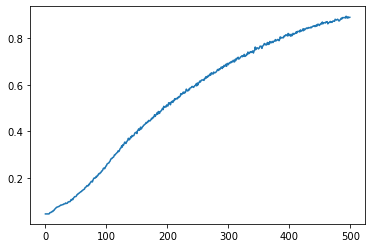

In [137]:
plt.plot(history.history['accuracy'])

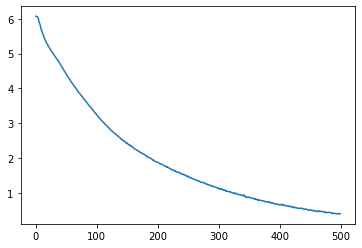

In [138]:
plt.plot(history.history['loss'])

## If not satisfied with the results -- train again

## Load Model

In [139]:
# Loads the weights
model.load_weights(checkpoint_path)

In [140]:
len(lines)

9614

## Predict

In [141]:
# predict func
def generate_text(model , tokenizer , text_seq_length , seed_text , n_words):
    final_ans = []
    for n  in range(n_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded] , maxlen = text_seq_length , truncating = 'pre')
        
        y_pred = model.predict_classes(encoded)
        
        pred_word =  " "
        
        for word , index in tokenizer.word_index.items():
            if index == y_pred:
                pred_word = word
                break
        seed_text = seed_text + " " + pred_word
        final_ans.append(pred_word)
    return " ".join(final_ans)

In [142]:
inp = lines[3455]
print("Input: " , inp)
print("")
print("Output: " ,generate_text(model , tokenizer , seq_length , inp , 50))


Input:  for times like this oh right now l should be starting to suspect someone involved with the police kira has found a way to obtain information from the task foroe headquarters i cannot ignore this fact what is kiras real objective what is he trying to do but i dont get

Output:  it by getting rid of the student theory arent you at a bigger disadvantage if l thinks youre connected to the police my reason is its to be home whats the file and message and the results of japan i want you is to forget that it hey death in


In [143]:
inp = lines[720]
print("Input: " , inp)
print("")
print("Output: " ,generate_text(model , tokenizer , seq_length , inp , 10))


Input:  some money yen will do w what again sudou shall i kill him what you refusing no id better avoid people around me no why should i worry no one would care if one or two people like him died now we can go to the arcade after school maki wanna

Output:  party with some guys tomorrow absolutely hey me too damn


In [144]:
inp = lines[6698]
print("Input: " , inp)
print("")
print("Output: " ,generate_text(model , tokenizer , seq_length , inp , 30))


Input:  it if it comes to that ill do it its all right we dont have to pass notes as long as we whisper he wont hear us over the sound of the bus do you have proof that youre not his accomplice a accomplice its pretty common the culprit pretends hes

Output:  alone and just in case hell leave someone to keep watch with the task here in your investigative life span in destroyed and the police are beginning to japan to


In [145]:
inp = lines[8878]
print("Input: " , inp)
print("")
print("Output: " ,generate_text(model , tokenizer , seq_length , inp , 40))


Input:  life before your job no i will not remove myself from this case i will not yield to evil dad dear dad thats admirable im proud of you if anything ever happens to you ill see that kira gets executed kira will probably kill all who oppose him even if theyre

Output:  not criminals we may all be killed by kira think of your lives your families and friends if anyone wants to be removed from this investigation please resign if you resign you will not be demoted i promise you i
